## Using Google API

> Please prepare a CSV file containing the longitude and latitude of the locations to be downloaded. The sample format matches the output of next cell.

In [ ]:
csv_path = "locations.csv"
Google_API_key = "YOUR_API_KEY"

In [ ]:
import pandas as pd
df = pd.read_csv(csv_path)
df

Longitude  Latitude
0    -73.980    40.686
1    -73.966    40.687
2    -73.791    40.668
3    -73.709    40.735

In [ ]:
!python streetView_collector.py --api_key {Google_API_key} --csv_file_path {csv_path} --project_area NYC --start_row 1 --end_row 3

🛠️ [INFO] Setting up configurations...
📂 [INFO] Directories prepared:
 - 📸 Images: .\street_view_images
 - 🔗 Concatenated Images: .\street_view_concate
📜 [INFO] Loading CSV file: ./locations.csv
📍 [INFO] Loaded 4 location(s) from CSV.
📌 [INFO] Processing point 1: Latitude=40.687, Longitude=-73.966
📷 [INFO] Downloading left view image...
✅ [SUCCESS] Image saved: .\street_view_images\p1_left_40.687_-73.966.jpg
📷 [INFO] Downloading front view image...
✅ [SUCCESS] Image saved: .\street_view_images\p1_front_40.687_-73.966.jpg
📷 [INFO] Downloading right view image...
✅ [SUCCESS] Image saved: .\street_view_images\p1_right_40.687_-73.966.jpg
📷 [INFO] Downloading back view image...
✅ [SUCCESS] Image saved: .\street_view_images\p1_back_40.687_-73.966.jpg
🖼️ [INFO] Displaying images side by side...
Figure(1000x1000)
🖼️ [SUCCESS] Concatenated image saved: .\street_view_concate\p1_concate_40.687_-73.966.jpg
📌 [INFO] Processing point 2: Latitude=40.668, Longitude=-73.791
📷 [INFO] Downloading left vi


🌍 Point 1: 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]
                                                         

🌍 Point 2: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]
                                                         

🌍 Point 3: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]
                                                         


🖼️ [INFO] Displaying images side by side...


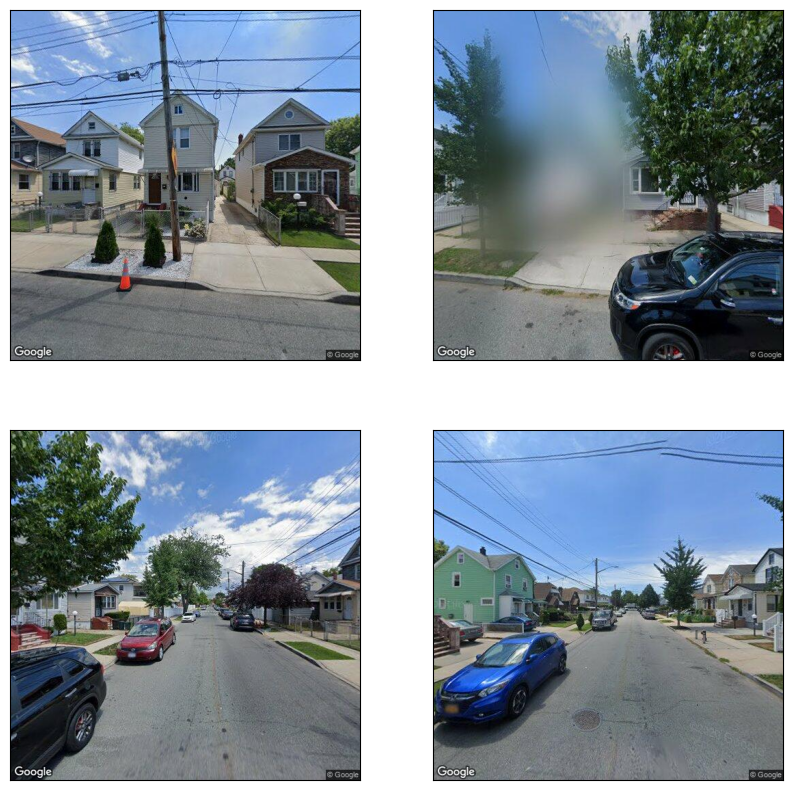

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
img_list = [
    'street_view_images/p2_right_40.668_-73.791.jpg',
    'street_view_images/p2_left_40.668_-73.791.jpg',
    'street_view_images/p2_front_40.668_-73.791.jpg',
    'street_view_images/p2_back_40.668_-73.791.jpg'
]
print("🖼️ [INFO] Displaying images side by side...")
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(img_list):
    img = Image.open(img_path) 
    plt.subplot(2, 2, i + 1)
    plt.imshow(np.array(img))  
    plt.xticks([]), plt.yticks([])
plt.show(block=True) 

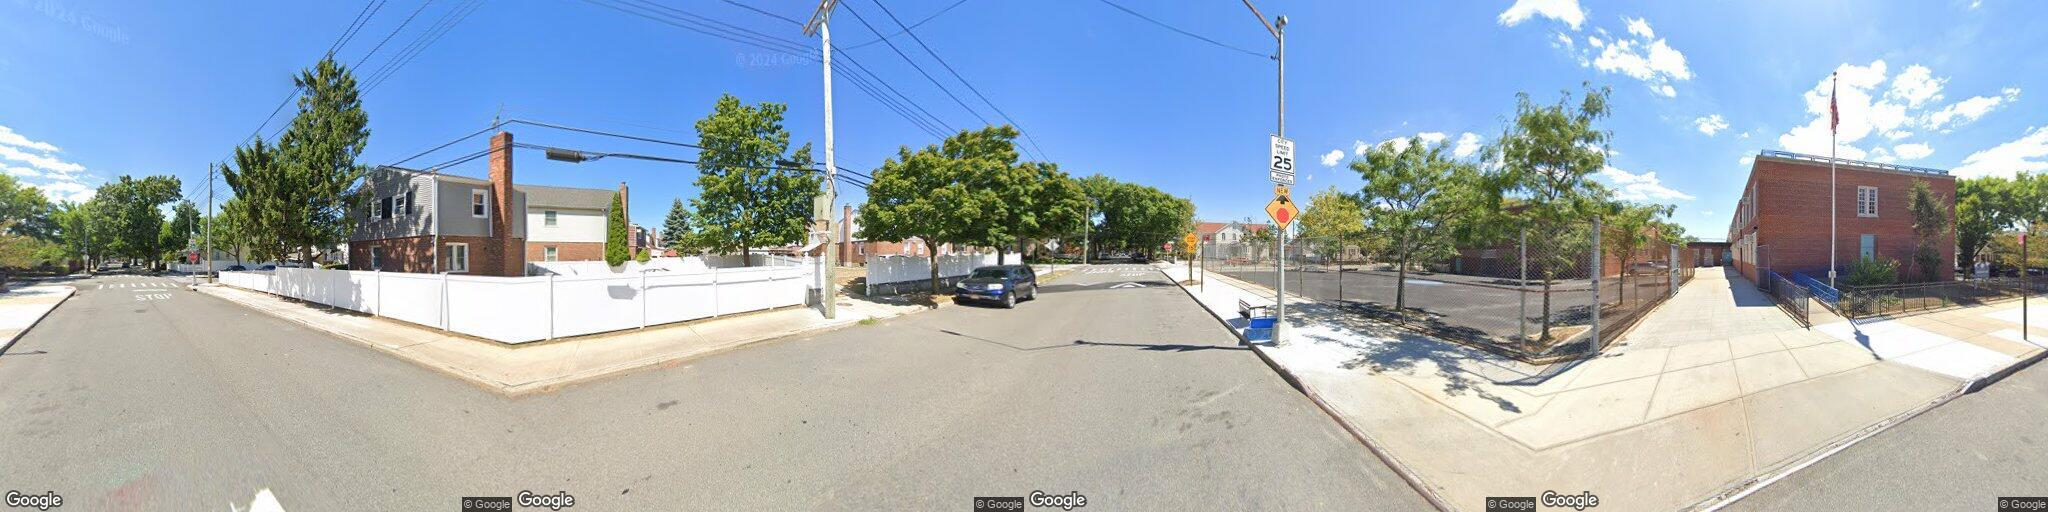

In [ ]:
import IPython.display as display
from PIL import Image
image_path = "street_view_concate/p3_concate_40.735_-73.709.jpg" 
img = Image.open(image_path)
display.display(img)

## Using Street View Collector by robolyst

In [ ]:
!git clone https://github.com/robolyst/streetview.git

Cloning into 'streetview'...
remote: Enumerating objects: 448, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 448 (delta 93), reused 76 (delta 68), pack-reused 307 (from 2)
Receiving objects: 100% (448/448), 6.70 MiB | 3.44 MiB/s, done.
Resolving deltas: 100% (176/176), done.
Updating files: 100% (61/61), done.


In [ ]:
%cd streetview

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from streetview import search_panoramas, get_panorama_async

> Please prepare a CSV file containing the longitude and latitude of the locations to be downloaded. The sample format matches the output of next cell.

In [ ]:
## Load your CSV file
csv_path = "locations.csv"
df = pd.read_csv(csv_path)
num_rows = len(df)
df

Longitude  Latitude
0    -73.980    40.686
1    -73.966    40.687
2    -73.791    40.668
3    -73.709    40.735

⚠️ Warning: end_idx (15) exceeds the total number of rows (4). Adjusting to 4.


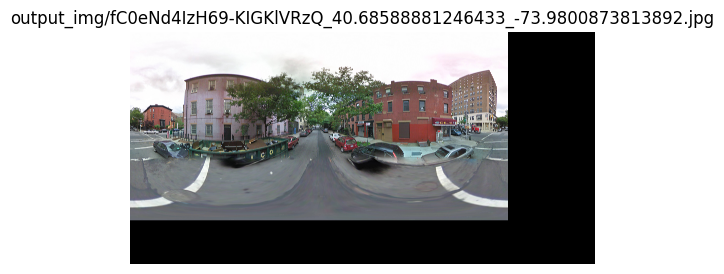

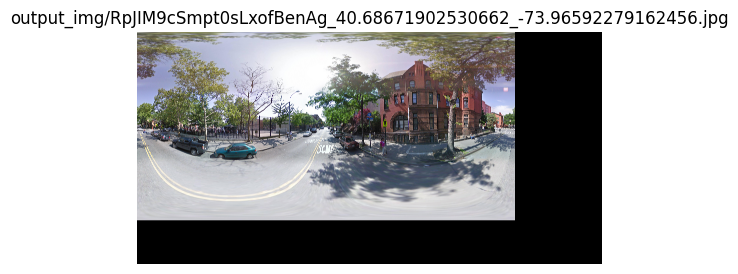

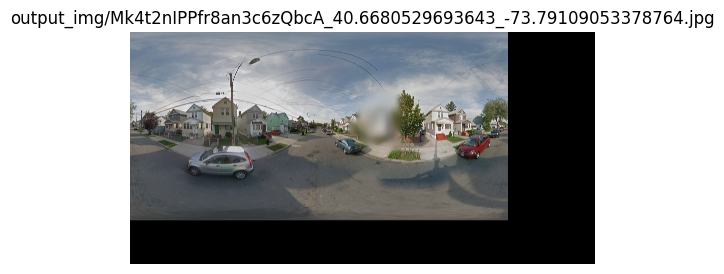

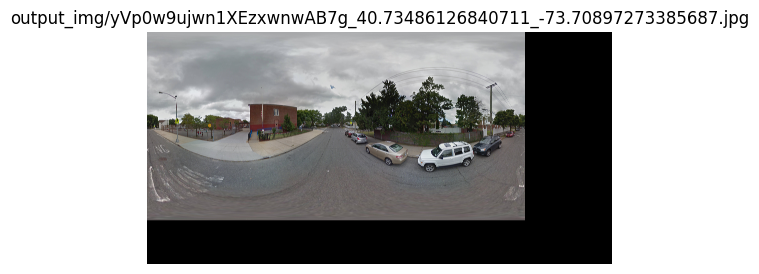

✅ Process completed: Downloaded images from line 1 to 4.


In [ ]:
####### Plese set the start and end row indices to select from the CSV file.
start_idx = 1
end_idx = 15
## Visualization setting (True: Show all images, False: Download only)
visualize = True
####################################################################################

####### Check if end_idx exceeds the data range #######
start_idx = max(0, start_idx - 1)
if end_idx > num_rows:
    print(f"⚠️ Warning: end_idx ({end_idx}) exceeds the total number of rows ({num_rows}). Adjusting to {num_rows}.")
    end_idx = num_rows  # Set to the last available row
output_dir = "output_img"
os.makedirs(output_dir, exist_ok=True)
## Download and visualize Street View panoramas
for i in range(start_idx, end_idx):
    lat, lon = df.iloc[i]["Latitude"], df.iloc[i]["Longitude"]
    ## Search for Street View panorama
    panos = search_panoramas(lat=lat, lon=lon)
    if not panos:
        print(f"No panorama image found at ({lat}, {lon})")
        continue
    first = panos[0]
    ## Download panorama image
    image = await get_panorama_async(pano_id=first.pano_id, zoom=5)
    image_file = os.path.join(output_dir, f"{first.pano_id}_{first.lat}_{first.lon}.jpg")
    image.save(image_file, "jpeg")
    ## Visualize all images if enabled
    if visualize:
        img = cv2.imread(image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(image_file)
        plt.axis("off")
        plt.show()
print(f"✅ Process completed: Downloaded images from line {start_idx + 1} to {end_idx}.")